# The Spark Foundation
# Data Science & Business Analytics - Task: 2
### By: Sumeet Sonkusare

## Title: Prediction using unsupervised ML
### Objective: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

### 1. Import Libraries

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

### 2. Load csv file using pandas library

In [161]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 3. Overview of data before clustering

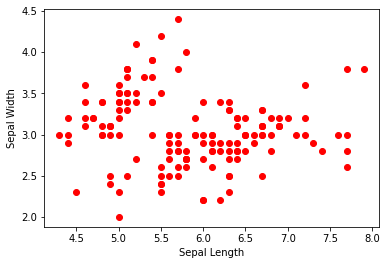

In [162]:
x = df.iloc[:,[1,2,3,4]].values
x
plt.scatter(x[:,0], x[:,1], color = 'red')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

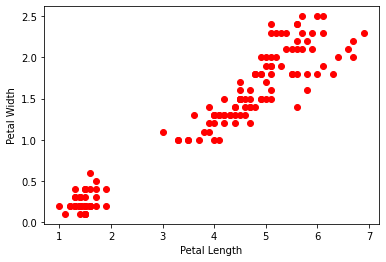

In [163]:
plt.scatter(x[:,2], x[:,3], color = 'red')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

### 4. Find the number of clusters ( K - Value)

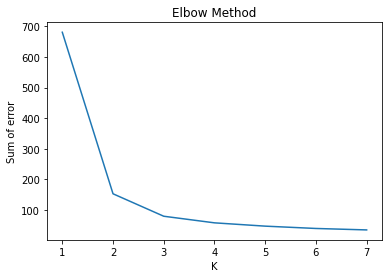

In [164]:
error = []
for i in range(1,8):
    kmns = KMeans(n_clusters = i).fit(x)
    kmns.fit(x)
    error.append(kmns.inertia_)

plt.plot(range(1,8), error)
plt.xlabel("K")
plt.ylabel("Sum of error")
plt.title("Elbow Method")
plt.show()

### Using Elbow method k=3 found to be optimum number of clusters in given dataset

### 5. Grouping the dataset by using all the four attribute(SepalLengthCm, SepalWidthCm, PetalLengthCm,      PetalWidthCm) into three clusters(0, 1, 2)

In [165]:
k = KMeans(n_clusters = 3)
clusters = k.fit_predict(x)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### 6. Centroid defined of each attribute(SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) for each cluster(0, 1, 2)

In [166]:
centroid = k.cluster_centers_    
centroid

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

### 7. Adding cluster column to the dataframe

In [167]:
df['Clusters'] = clusters
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


### 8. Clustterd plotting of sepal length and sepal width

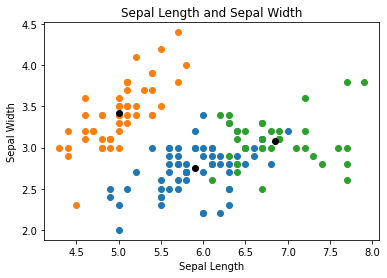

In [170]:
a = df[df['Clusters'] == 0]
b = df[df['Clusters'] == 1]
c = df[df['Clusters'] == 2]

plt.scatter(a.SepalLengthCm, a.SepalWidthCm, label = 'Iris-setosa')
plt.scatter(b.SepalLengthCm,b.SepalWidthCm, label = 'Iris-virginica')
plt.scatter(c.SepalLengthCm,c.SepalWidthCm, label = 'Iris-versicolor')
plt.scatter(centroid[:,0],centroid[:,1], color = 'black', label = 'centroid')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length and Sepal Width")
plt.show()

### Clustterd plotting of Petal length and Petal width

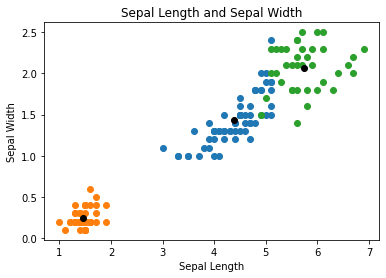

In [171]:
a = df[df['Clusters'] == 0]
b = df[df['Clusters'] == 1]
c = df[df['Clusters'] == 2]

plt.scatter(a.PetalLengthCm, a.PetalWidthCm, label = 'Iris-setosa')
plt.scatter(b.PetalLengthCm,b.PetalWidthCm, label = 'Iris-virginica')
plt.scatter(c.PetalLengthCm,c.PetalWidthCm, label = 'Iris-versicolor')
plt.scatter(centroid[:,2],centroid[:,3], color = 'black', label = 'centroid')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length and Sepal Width")
plt.show()